# Visualization of Time-series data


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [20]:
log = pd.read_csv('Sunil_Log.csv')

In [21]:
log.columns

Index(['time1', 'labels1', 'time2', 'labels2', 'time3', 'labels3', 'time4',
       'labels4', 'time5', 'labels5', 'time6', 'labels6', 'time7', 'labels7'],
      dtype='object')

## Plot-1: plotting stimuli over time with dot

In [89]:
def recomputeTime(log,exp_no):
    """
    This function recomputes the time for each log file considering start time as 0.
    
    log    : pandas dataframe of log file,
    exp_no : experiment number
    """
    
    col_name = 'time' + str(exp_no)
    
    rst_label = 'time'+str(exp_no)+'_sec'
    
    log['time1_date'] = pd.to_datetime(log[col_name])
    log['time1_date2'] = log['time1_date'] - log['time1_date'].to_list()[0]
    log[rst_label] = log['time1_date2'].dt.seconds
    
    return log

In [148]:
def plotExperimentPlot1(log,exp_no,save=False):
    """
    This function plot the stimuli on y-axis and time on x-axis.
    
    log    : pandas dataframe of log file.
    exp_no : experiment number
    """
    log_df = recomputeTime(log,exp_no)
    figure_title = 'Experiment ' + str(exp_no)
    sns.set(rc = {'figure.figsize':(10,4)})
    sns.set_theme(style="white", palette=None)
    
    sns.catplot(x='time1_sec',y='labels1',data=log,order=['NO STIMULI', 'Reassurance', 'Praise', 'Directed Action','Emotional Reflection','Emotional Advice','STOP'][::-1])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Stimuli')
    plt.title(figure_title)
    plt.tight_layout()
    if save:
        file = 'type_1_experiment_'+str(exp_no)+'.png'
        plt.savefig(file,format='png')
    else:
        plt.show()
    

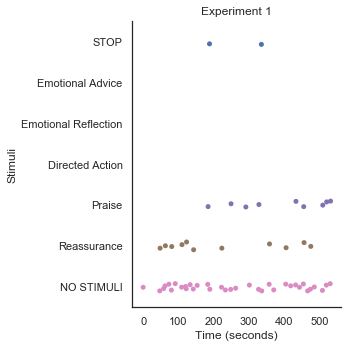

In [151]:
plotExperimentPlot1(log,1)


# Plot-2: plotting with connected lines

In [71]:
log['labels1'].unique()

array(['NO STIMULI', 'Reassurance', 'Praise', 'STOP'], dtype=object)

In [107]:
log['labels4'].unique()

array(['NO STIMULI', 'Directed Action', nan], dtype=object)

In [159]:
def plotExperimentPlot2(log,i,save=False):
    """
    This function plots one experiment plot.
    log    : pandas dataframe of log file.
    i : experiment number
    """
    plt.figure()
    exp_label = 'Experiment ' + str(i)
    time_label = 'time'+str(i)+'_sec'
    stimuli_label = 'labels'+str(i)
    
    log_df = recomputeTime(log,i)
    label = log_df[stimuli_label].map({'NO STIMULI':1, 'Reassurance':2, 'Praise':3,'Directed Action':4,'Emotional Reflection':5, 'Emotional Advice':6,'STOP':7})
    figure_title = 'Experiment ' + str(1)
    plt.plot(log_df[time_label],label,label=exp_label)
    plt.title(exp_label)
    plt.yticks([1,2,3,4,5,6,7],['NO STIMULI', 'Reassurance', 'Praise', 'Directed Action','Emotional Reflection','Emotional Advice','STOP'])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Stimuli')
    plt.tight_layout()
    if save:
        file = 'type_2_experiment_'+str(i)+'.png'
        plt.savefig(file,format='png')
    else:
        plt.show()


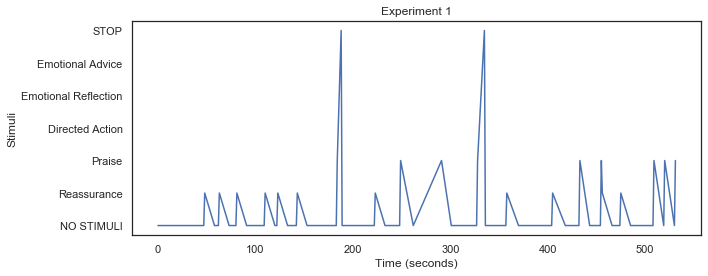

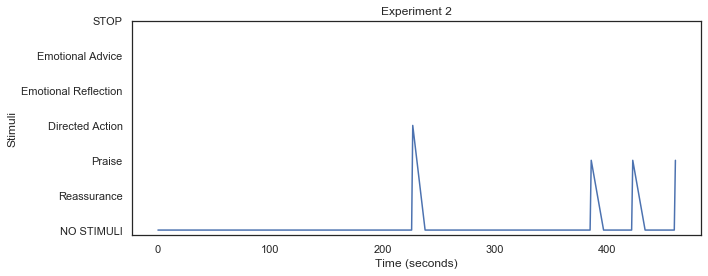

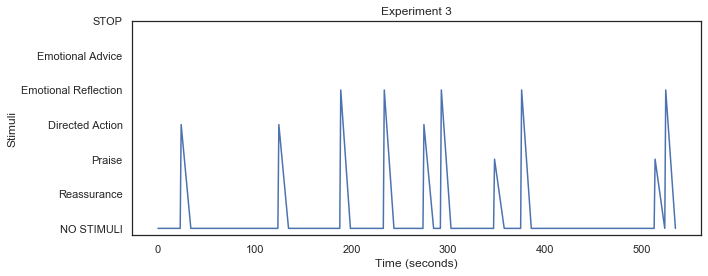

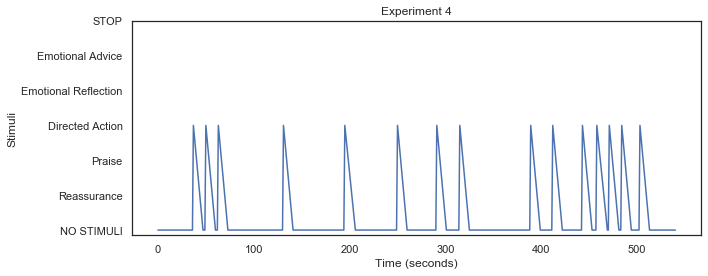

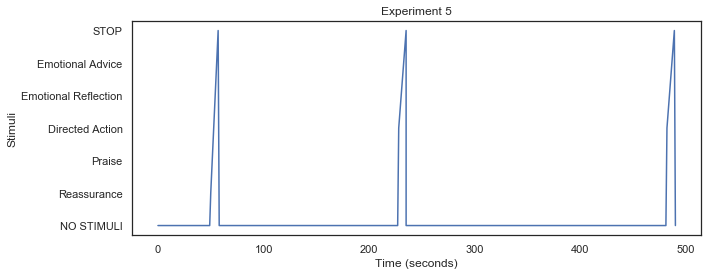

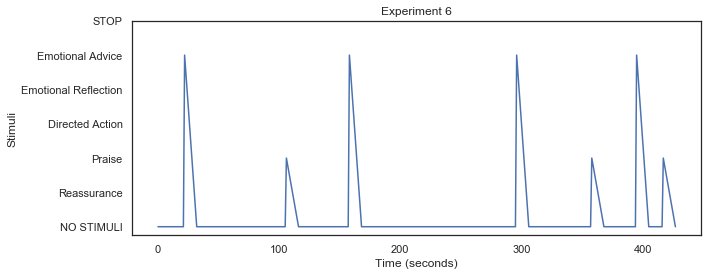

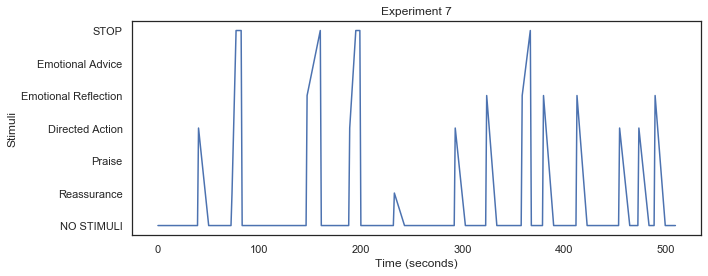

In [160]:
for i in range(1,8):
    plotExperimentPlot2(log,i,True)

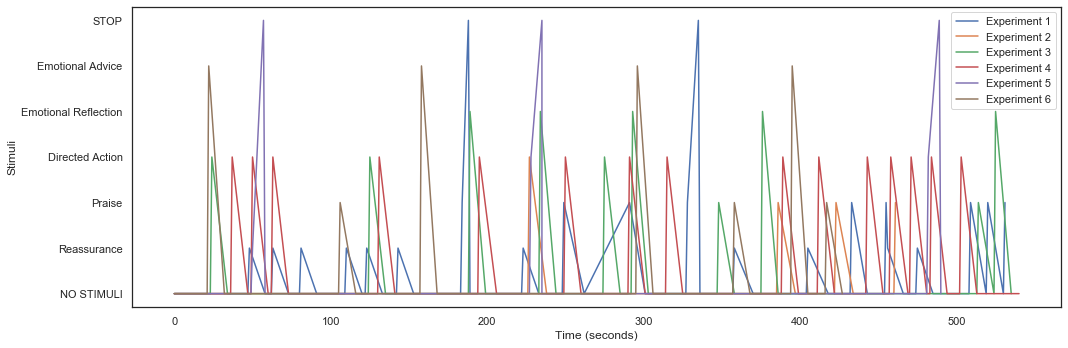

In [165]:
# plot all plots of type2 for experiment

plt.figure(figsize=(15,5))
for i in range(1,7):
    exp_label = 'Experiment ' + str(i)
    time_label = 'time'+str(i)+'_sec'
    stimuli_label = 'labels'+str(i)
    
    log_df = recomputeTime(log,i)
    label = log_df[stimuli_label].map({'NO STIMULI':1, 'Reassurance':2, 'Praise':3,'Directed Action':4,'Emotional Reflection':5, 'Emotional Advice':6,'STOP':7})
    figure_title = 'Experiment ' + str(1)
    plt.plot(log_df[time_label],label,label=exp_label)
plt.yticks([1,2,3,4,5,6,7],['NO STIMULI', 'Reassurance', 'Praise', 'Directed Action','Emotional Reflection','Emotional Advice','STOP'])

plt.xlabel('Time (seconds)')
plt.ylabel('Stimuli')
plt.legend()
plt.tight_layout()
plt.savefig('type_2_all_experiment.png',format='png')
plt.show()

### Plotting all experiments using type-2 plot

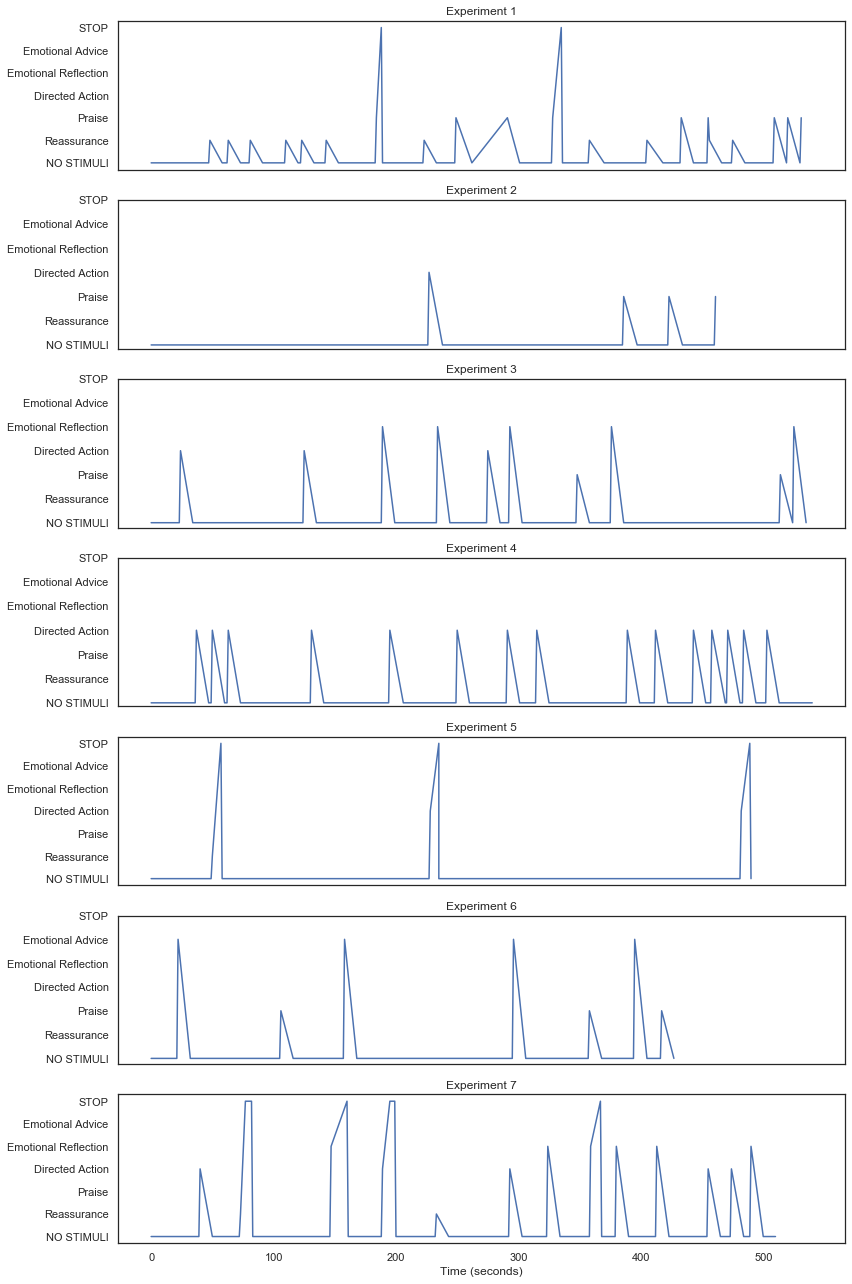

In [166]:

fig, ax = plt.subplots(7,figsize=(12,18),sharex=True)

for i in range(1,8):
    exp_label = 'Experiment ' + str(i)
    time_label = 'time'+str(i)+'_sec'
    stimuli_label = 'labels'+str(i)
    
    log_df = recomputeTime(log,i)
    label = log_df[stimuli_label].map({'NO STIMULI':1, 'Reassurance':2, 'Praise':3,'Directed Action':4,'Emotional Reflection':5, 'Emotional Advice':6,'STOP':7})
    figure_title = 'Experiment ' + str(1)
    ax[i-1].plot(log_df[time_label],label)
    ax[i-1].set_yticks([1,2,3,4,5,6,7])
    ax[i-1].set_yticklabels(['NO STIMULI', 'Reassurance', 'Praise', 'Directed Action','Emotional Reflection','Emotional Advice','STOP'])

    ax[i-1].set_title(exp_label)

    
plt.xlabel('Time (seconds)')

plt.tight_layout()
plt.savefig('type_2_all_experiment_verticle.png',format='png')
plt.show()